# Predicting Stock Prices Using Closing Price 


## Project Goals
#### visualize SPY data to look for any patterns that enhance predictability
#### create a model that predicts stock future prices based on historical prices 
#### achieve the goal using deep learning neuro network Long Short-Term Memory


---

## Executive summary


## 1. Acquiring and Preparing Stock Data
#### - Data is acquired from Yahoo finance from 2007-01-01 to 2022-07-08
#### - Engineered features: simple moving average(sma), percent_change, spy_return(logbased)
#### - Data has 3906 rows, 6 columns before cleaning and 3901 rows and 5 columns after
#### -  columns dropped : 
    "Open", "High", "Low", "Adj_Close"
#### - Split the data into train, validate, test
#### - Scaled data using a minmax scaler

---

## Preproject Hypothesis 
* Can returns be described with a normal distribution?
* Is daily change non-zero?
* Can price movement be described as a random walk?


---

### (i) Set up environment 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
import seaborn as sb
sb.set()
import pandas_datareader as pdr
import prepare 

### (ii) Download stock price data, store in dataframe from yahoo

In [2]:
df = pdr.DataReader("SPY",data_source = "yahoo", start = "2007-01-01", end = "2022-07-08")
df.shape

(3906, 6)

### (iii) Checking the data

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-01-03,142.860001,140.570007,142.250000,141.369995,94807600.0,104.301613
2007-01-04,142.050003,140.610001,141.229996,141.669998,69620600.0,104.522972
2007-01-05,141.399994,140.380005,141.330002,140.539993,76645300.0,103.689224
2007-01-08,141.410004,140.250000,140.820007,141.190002,71655000.0,104.168777
2007-01-09,141.600006,140.399994,141.309998,141.070007,75680100.0,104.080292


### (iv) Create a log rate of return in separate series using closing price


In [4]:
#creating the log rate of return
stock_return = round(np.log(df.Close).diff() * 100, 2)
stock_return.dropna(inplace = True)
stock_return.head()

Date
2007-01-04    0.21
2007-01-05   -0.80
2007-01-08    0.46
2007-01-09   -0.09
2007-01-10    0.33
Name: Close, dtype: float64

---

#### Split the data

In [5]:
#code pulls a function from a prepare file
train, validate, test = prepare.split_data(df)
train.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-01-03,142.860001,140.570007,142.250000,141.369995,94807600.0,104.301613
2007-01-04,142.050003,140.610001,141.229996,141.669998,69620600.0,104.522972
2007-01-05,141.399994,140.380005,141.330002,140.539993,76645300.0,103.689224
2007-01-08,141.410004,140.250000,140.820007,141.190002,71655000.0,104.168777
2007-01-09,141.600006,140.399994,141.309998,141.070007,75680100.0,104.080292


#### Split the series


In [8]:
train_s, validate_s, test_s = prepare.split_data(stock_return)
train_s.head()

Date
2007-01-04    0.21
2007-01-05   -0.80
2007-01-08    0.46
2007-01-09   -0.09
2007-01-10    0.33
Name: Close, dtype: float64

# 2. Exploration

### (i) visualizing stock chart with the different splits (Train, Validate and Test)


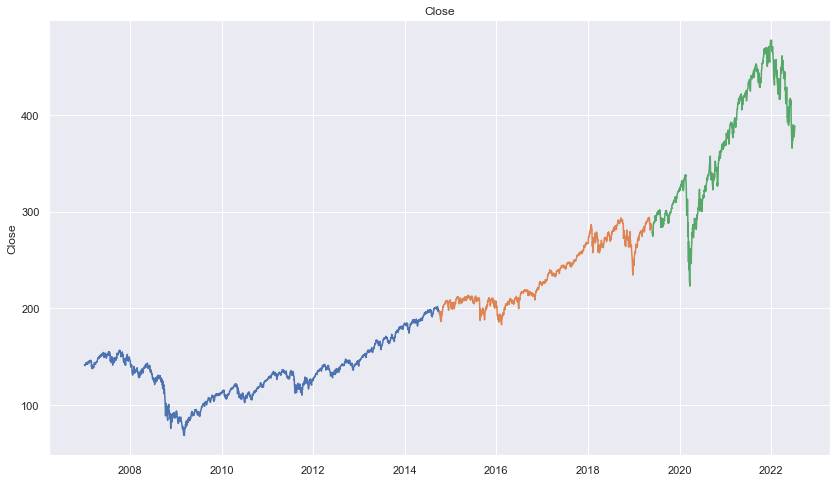

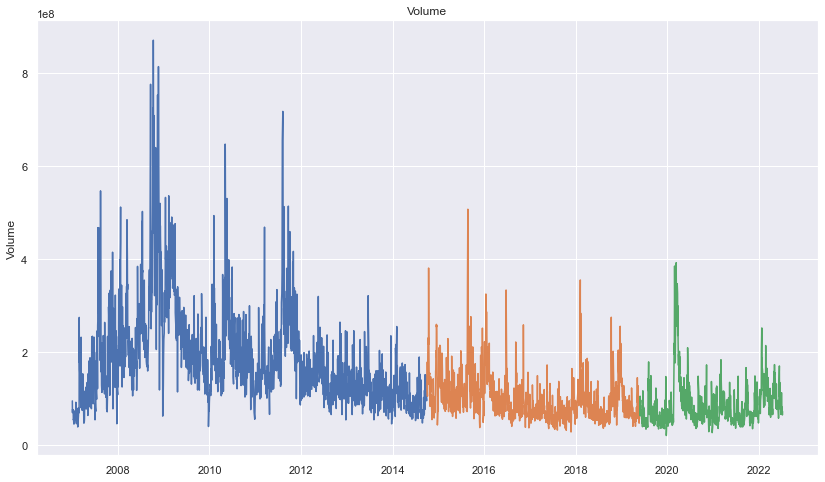

In [10]:
#visualizing stock chart with the different splits (Train, Validate and Test)
cols = ["Close","Volume"]
for col in cols:
    plt.figure(figsize=(14,8))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

### (ii) Visualizing price and volume looking for trends


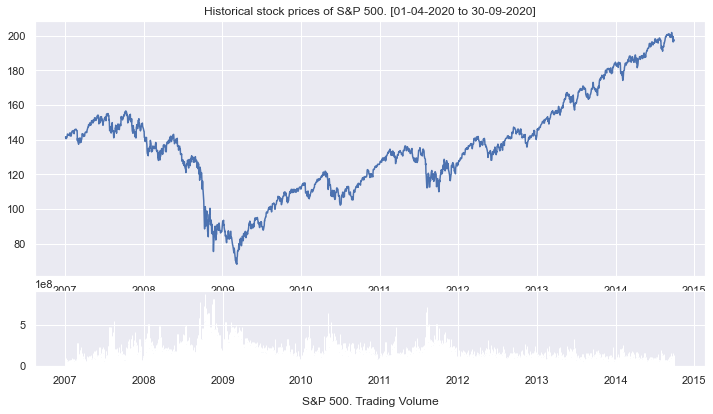

In [24]:
acquire.plot_volprice()

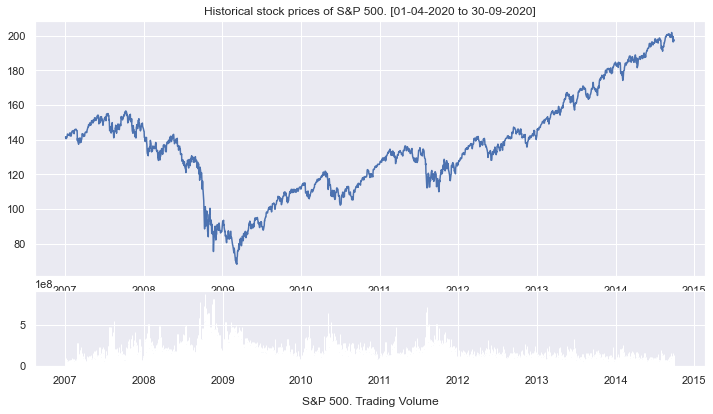

In [16]:
plot_volprice()

### (iii) Plotting the returns

<AxesSubplot:xlabel='Date'>

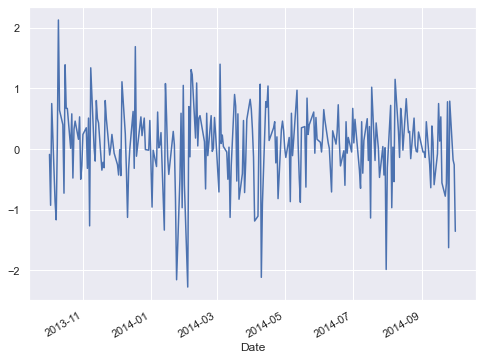

In [26]:
train_s[-252:].plot()

### 6. Pandas describe function gives descriptive statistics, default assumes you are dealing with a sample Pandas also deals with missing values by omitting them 

In [ ]:
amzn_return.describe()

### 7. An alternative more slightly  different table of descriptives from scipy stats

In [ ]:
from scipy import stats

In [ ]:
n, minmax, mean, var, skew, kurt = stats.describe(amzn_return)
mini, maxi = minmax
std = var ** .5

### 9. for comparision generate random numbers that follow normal distribution


In [ ]:
from scipy.stats import norm

In [ ]:
x = norm.rvs(mean, std, n)

In [ ]:
stats.describe(x)

In [ ]:
plt.hist(x, bins=15)

In [ ]:
plt.hist(amzn_return, bins = 15)
plt.xlim(-6,6);

## Is price change normally distributed?

### 10. Use scipy stats to test the kurtosis, the null hypothesis is that the sample is drawn from a population where the underlying kurtosis is that of a normally distributed variable

In [ ]:
x_test = stats.kurtosistest(x)
amzn_test = stats.kurtosistest(amzn_return)
print(f'{"     Test statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"* 30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"AMZN: {amzn_test[0]:13.2f}{amzn_test[1]:16.4f}")

### 11. plot histogram of price changes with normal curve overlay


In [ ]:
plt.hist(amzn_return, bins = 25, edgecolor='w', density= True)
data = np.linspace(mini, maxi, 100)
plt.plot(data, norm.pdf(data, mean, std));

### 12. Compare normally distributed sample with same attributes as amzn price change

In [ ]:
plt.hist(x, bins =25, density = True)
b = np.linspace(mini, maxi, 100)
plt.plot(b,stats.norm.pdf(b, mean, std))
plt.xlim(-5,5);

## Is daily price change significantly different from zero?

### 13. Conduct simple hypothesis test

In [ ]:
stats.ttest_1samp(amzn_return.sample(252), 0, alternative='two-sided')

## Can price movement be described as a random walk?

### 14. Create price lags

In [ ]:
amzn_close = pd.DataFrame(amzn.Close, columns= ['Close'])
amzn_close['lag_1'] = amzn_close.Close.shift(1)
amzn_close['lag_2'] = amzn_close.Close.shift(2)
amzn_close.dropna(inplace = True)
amzn_close.head()

### 15. Fit linear model

In [ ]:
lr = np.linalg.lstsq(amzn_close[['lag_1', 'lag_2']], amzn_close.Close, rcond=None)[0]

In [ ]:
amzn_close['predict'] = np.dot(amzn_close[['lag_1', 'lag_2']], lr)

In [ ]:
amzn_close.head()

In [ ]:
amzn_close.iloc[-252:][['Close', 'predict']].plot()